# Introduction to spatial data

In [1]:
%matplotlib inline
from IPython.display import HTML, IFrame, Image

import geopandas as gpd
from shapely.geometry import Point, LineString
import seaborn as sns
import contextily as ctx
import matplotlib.pyplot as plt

## Reading and manipulating Data

In [2]:
db = gpd.read_file('../data/bh.gpkg')

This a `GeoDataFrame`, a `DataFrame` on "geo-steroids"!

In [3]:
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 8 columns):
NM_MUNICIP              105 non-null object
CD_GEOCMU               105 non-null object
Total Monthly Wages     105 non-null float64
Total Jobs              105 non-null int64
Total Establishments    105 non-null int64
Average Monthly Wage    105 non-null float64
Industry Diversity      105 non-null int64
geometry                105 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 6.6+ KB


In [4]:
db.crs

{'init': 'epsg:4674'}

In [5]:
db.total_bounds

array([-45.011947, -20.927592, -42.474462, -18.068036])

In [6]:
db.area.head()

0    0.051780
1    0.032049
2    0.016113
3    0.047802
4    0.029379
dtype: float64

More over at:

> [http://geopandas.org/](http://geopandas.org/)

## Plotting Data

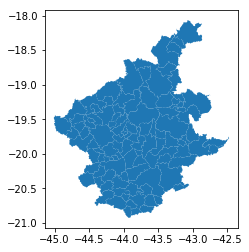

In [7]:
db.plot();

* Reproject to [Web Mercator](http://epsg.io/3857), the trick of the web trade

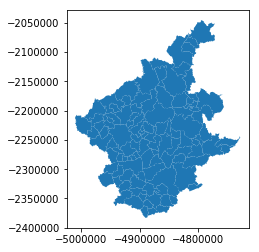

In [8]:
db_wm = db.to_crs(epsg=3857)
db_wm.plot();

And, thanks to `contextily`, voila!

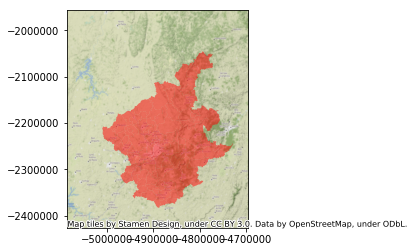

In [9]:
ax = db_wm.plot(alpha=0.5, color='red')
ctx.add_basemap(ax);

Maps in Python speak the same idiom as any other visualisation, and you can use `matplotlib` patterns in very much the same way:

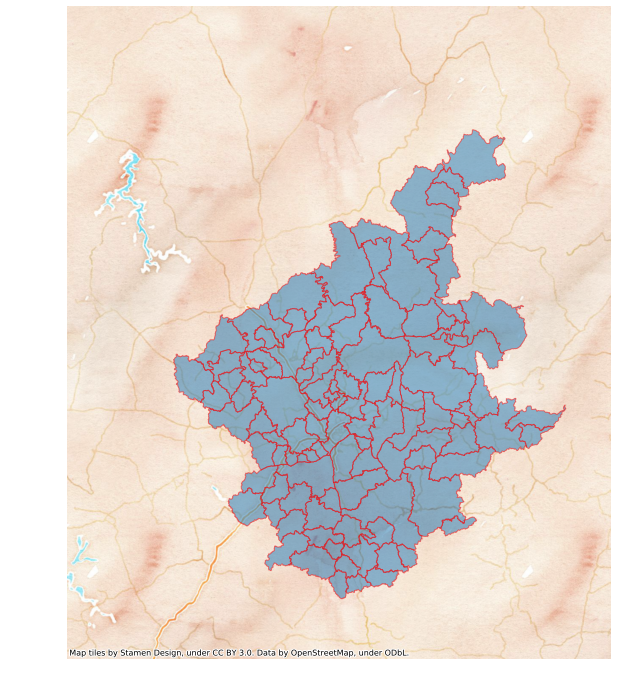

In [10]:
f, ax = plt.subplots(1, figsize=(12, 12))
db_wm.plot(alpha=0.5, edgecolor='r', ax=ax)
ctx.add_basemap(ax, url=ctx.sources.ST_WATERCOLOR,
                alpha=0.75)
ax.set_axis_off()
plt.show()

More `contextily` at:

> [https://github.com/darribas/contextily](https://github.com/darribas/contextily)

**CHALLENGE** 

1. Create a map only with the municipality of Belo Horizonte.
1. Create a map with the municipality of Belo Horizonte in red, and the rest in black.
1. Create a map only with the municipality of Belo Horizonte and the "OSM_A" basemap for context.

## Playing with individual geometries

* One polygon

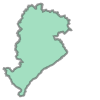

In [11]:
bh = db.query('NM_MUNICIP == "BELO HORIZONTE"')['geometry'].iloc[0]
# Commented so it compiles to PDF. Uncomment to render
bh

* Two points

In [12]:
url = ('<iframe width="425" height="350" frameborder="0" scrolling="no" '
       'marginheight="0" marginwidth="0" '
       'src="https://www.openstreetmap.org/export/embed.html?'
       'bbox=-43.94023776054383%2C-19.936146317203217%2C-43.93447637557984%'
       '2C-19.92917681259664&amp;layer=mapnik&amp;marker=-19.932651517215522%'
       '2C-43.93735706806183" style="border: 1px solid black"></iframe><br/>'
       '<small><a href="https://www.openstreetmap.org/?mlat=-19.93265&amp;'
       'mlon=-43.93736#map=17/-19.93266/-43.93736">View Larger Map</a></small>')
HTML(url)

In [13]:
niemayer = Point(-43.937367, -19.932666)

In [14]:
url = ('<iframe width="425" height="350" frameborder="0" scrolling="no" '
       'marginheight="0" marginwidth="0" src="https://www.openstreetmap.org/'
       'export/embed.html?bbox=-44.014062881469734%2C-19.68938475984472%2C'
       '-43.9218807220459%2C-19.577663101027863&amp;layer=mapnik&amp;'
       'marker=-19.633533644887653%2C-43.96797180175781" '
       'style="border: 1px solid black"></iframe><br/><small>'
       '<a href="https://www.openstreetmap.org/?mlat=-19.6335&amp;'
       'mlon=-43.9680#map=13/-19.6335/-43.9680">View Larger Map</a></small>')
HTML(url)

In [15]:
campins = Point(-43.9680, -19.6335)

* One [Line](https://graphhopper.com/maps/?point=praca%20da%20libertade%2C%20belo%20horizonte&point=campins%20airport%2C%20belo%20horizonte&locale=en-US&vehicle=car&weighting=fastest&elevation=true&use_miles=false&layer=Omniscale)

In [16]:
url = ('https://graphhopper.com/maps/?point=praca%20da%20libertade%2C%20belo%20horizonte&point=campins%20airport%2C%20belo%20horizonte&locale=en-US&vehicle=car&weighting=fastest&elevation=true&use_miles=false&layer=Omniscale')
IFrame(url, 800, 400)

In [17]:
ride = gpd.read_file('../data/trip.gpkg').to_crs(epsg=4326).loc[0, 'geometry']

* Combined

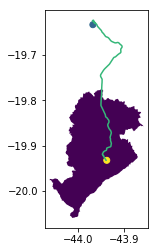

In [18]:
gpd.GeoSeries([bh, campins, ride, niemayer]).plot(cmap='viridis')

* Point in polygon

In [19]:
IFrame('https://en.wikipedia.org/wiki/Point_in_polygon',
       600, 400)

In [20]:
bh.contains(niemayer)

True

In [21]:
bh.within(campins)

False

Also with lines:

In [22]:
ride.intersects(bh)

True

In [23]:
bh.contains(ride)

False

In [24]:
ride.crosses(campins)

False

In [25]:
IFrame(('https://shapely.readthedocs.io/en/stable/manual.html#'\
       'predicates-and-relationships'),
       750, 600)

### Spatial operations on Geo-objects

In [26]:
db.contains(niemayer)

0      False
1      False
2      False
3      False
4      False
5      False
6       True
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
75     False
76     False
77     False
78     False
79     False
80     False
81     False
82     False
83     False
84     False
85     False
86     False
87     False
88     False
89     False
90     False
91     False
92     False
93     False
94     False
95     False
96     False
97     False
98     False
99     False
100    False
101    False
102    False
103    False
104    False
Length: 105, dtype: bool

You can use it as a mask to filter a GeoDataFrame:

In [27]:
mask = db.contains(niemayer)
db[mask]

,NM_MUNICIP,CD_GEOCMU,Total Monthly Wages,Total Jobs,Total Establishments,Average Monthly Wage,Industry Diversity,geometry
6,BELO HORIZONTE,3106200,3.616181e+09,1354683,70605,2669.39,585,POLYGON ((-43.95059853199997 -19.7766232399999...


## Python as a GIS

In [28]:
IFrame('http://geopandas.readthedocs.io/en/latest/reference.html',
       750, 600)

**EXERCISES**

Explore `geopandas` documentation and try to solve the following challenges:

* If you are at the lon/lat location -44.114207/-20.021930, in which neighbourhood are you?
* How far is the `niemayer` from the centroid of Santana dos Montes?
    - Convert the municipalities to a CRS expressed in metres ([wink wink!](http://epsg.io/29101))
* If we walked straight from West to East across the mean parallel, how many municipalities would we cross? Which ones?
    - Use the `total_bounds` attribute to find out the mean parallel
    - Create a straight line that goes from the most eastern point of the map to the most western tip (tip: use `total_bounds` of the neighbourhoods and check the help for `LineString` to create the line geometry)
    - Intersect the line with the areas of the Belo horizonte metro area
    - Use the resulting mask to filter all of the municipalities to those that are crossed by the line
* The centroids of how many municipalities fall within 10Km of that of the Belo Horizonte municipality? Help:
    - Query the municipalities and convert it to a CRS expressed in metres ([wink wink!](http://epsg.io/29101))
    - Extract its centroids
    - Draw a buffer around that of the `University`
    - Use `contains` on the buffer to check on every centroid
    - Use the returned list of Booleans to subset the names of those within the distance
* How far are the centroids of the smallest and largest local municipalities as measured by their area?

---


<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Geographic Data Science with Python - UFMG'19</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="https://github.com/darribas/gds_ufmg19" property="cc:attributionName" rel="cc:attributionURL">Dani Arribas-Bel</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.
